# 1. Título e Introdução 

## Previsão de Enchentes em Grandes Metropoles

Nos últimos meses, e até mesmo anos, temos observado que, devido ao mau uso dos sistemas de esgoto nas grandes metrópoles, há um aumento significativo no risco de enchentes durante os períodos de chuva. Esse cenário afeta especialmente as populações que vivem próximas a rios, colocando-as em situação de vulnerabilidade, muitas vezes correndo o risco de perderem seus pertences, como móveis e até mesmo o próprio lar.

Infelizmente, essas circunstâncias são reflexo de gestões públicas ineficientes, que historicamente pouco se preocuparam com as camadas mais pobres da sociedade.

Nesse contexto, o desenvolvimento de sistemas de Inteligência Artificial (IA) para a previsão de enchentes surge como uma importante ferramenta para promover uma melhor qualidade de vida. O objetivo é contribuir para um futuro mais seguro e digno, especialmente para as populações mais vulneráveis, oferecendo previsões mais precisas e possibilitando ações preventivas que minimizem os impactos desses eventos.

# 2. Bibliotecas
1.   Importação de Bibliotecas
2.   Descrição das Bibliotecas
3.   Carregamento e Exploração do Dataset






In [ ]:
import pandas as pd #biblioteca de processamento de dados
import matplotlib.pyplot as plt #biblioteca para visualizacao de dados (graficos)
import seaborn as sns #biblioteca para visualizacao de dados (graficos)
from sklearn.model_selection import train_test_split #validacao holdout
from sklearn.preprocessing import StandardScaler #funcao para padronizar minhas features
from tensorflow.keras.models import Sequential #tensorflow pacote para redes neurais
from tensorflow.keras.layers import Dense, Input #tensorflow pacote para redes neurais
from sklearn.neural_network import MLPClassifier #função pra calssificação
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #função de metricas
from sklearn.metrics import ConfusionMatrixDisplay #função de metricas

*   Pandas: A biblioteca Pandas é responsável pelo processamento e manipulação de dados, permitindo que os datasets sejam carregados, organizados e analisados de maneira eficiente e compreensível. Ela oferece funcionalidades como leitura de arquivos, limpeza, transformação, análise estatística e visualização de dados.
*   matplotlib.pyplot: A biblioteca matplotlib.pyplot é responsável pela criação de gráficos no programa, sendo uma das maneiras mais simples e eficazes de visualizar dados e facilitar a análise exploratória do dataset. Ela permite gerar diversos tipos de gráficos, como linhas, barras, dispersão e histogramas, além de possibilitar a personalização de cores, títulos, legendas e estilos visuais.
*   A biblioteca Seaborn é utilizada para criar visualizações estatísticas elegantes e informativas. Ela é baseada no Matplotlib, mas oferece gráficos com estilo mais sofisticado e código mais simples. Ao ser importada como sns, facilita seu uso ao longo do código. É amplamente empregada para gerar gráficos como heatmaps, boxplots, e gráficos de barras. No contexto de machine learning, é especialmente útil para visualizar a matriz de confusão e interpretar o desempenho do modelo.
*   sklearn.model_selection (train_test_split): A função train_test_split, do módulo sklearn.model_selection, é usada para dividir um conjunto de dados em subconjuntos de treinamento e teste. Isso é essencial para avaliar a capacidade de generalização de um modelo. Ela permite configurar a proporção entre treino e teste, além de definir uma semente aleatória para garantir a reprodutibilidade dos resultados. Também pode realizar divisões estratificadas, preservando a proporção das classes. Sua principal funcionalidade é facilitar uma separação eficiente e prática dos dados para o desenvolvimento de modelos robustos.
*   sklearn.preprocessing (StandardScaler): O StandardScaler, do módulo sklearn.preprocessing, é utilizado para normalizar dados, ajustando-os para que tenham média 0 e desvio padrão 1. Isso melhora o desempenho de algoritmos sensíveis à escala dos dados, como redes neurais. A transformação é feita com base na fórmula z = (x - média) / desvio padrão. Sua principal funcionalidade é padronizar os dados, garantindo uma aprendizagem mais eficiente e estável.
*   tensorflow.keras.models (Sequential): É uma classe do Keras, dentro do TensorFlow, que permite criar modelos de rede neural de forma linear.
Ela organiza as camadas de maneira sequencial, onde a saída de uma camada é a entrada da próxima. Facilita a construção de modelos simples, onde não há necessidade de múltiplas entradas ou saídas. Permite adicionar camadas com o método .add() e compilar o modelo para treinamento.
*   tensorflow.keras.layers (Dense): É uma camada de rede neural totalmente conectada, onde cada neurônio está ligado a todos os neurônios da camada anterior. Ela realiza uma transformação linear sobre os dados, seguida de uma função de ativação que introduz não-linearidade. Essa camada é muito utilizada em modelos de classificação e regressão, sendo essencial para que a rede aprenda padrões complexos e faça previsões precisas. Sua funcionalidade é permitir adicionar neurônios interligados que processam e transformam os dados na rede neural.
*   sklearn.neural\_network (MLPClassifier) é uma classe do Scikit-learn que implementa redes neurais do tipo Perceptron Multicamadas (MLP) para tarefas de classificação. Ela cria modelos compostos por múltiplas camadas de neurônios, que aprendem representações complexas dos dados. O treinamento é feito com o algoritmo de retropropagação, ajustando os pesos para minimizar o erro. Sua funcionalidade é permitir construir e treinar redes neurais de múltiplas camadas para resolver problemas de classificação de forma prática e eficiente.
*   sklearn.metrics (accuracy_score): A função accuracy_score calcula a acurácia do modelo, ou seja, a proporção de acertos em relação ao total de previsões feitas. É uma métrica simples e útil, especialmente quando as classes estão balanceadas. No entanto, pode ser enganosa em conjuntos de dados desbalanceados, pois um modelo pode obter alta acurácia apenas por prever a classe mais frequente.
*   sklearn.metrics (classification_report): A função classification_report gera um relatório detalhado contendo métricas por classe, como precisão, revocação, f1-score e suporte. Esse relatório permite uma avaliação mais completa do desempenho do modelo, facilitando a identificação de classes em que o modelo apresenta dificuldades.
*   sklearn.metrics (confusion_matrix): A função confusion_matrix produz uma matriz que compara os valores reais com as previsões do modelo. Nela, é possível visualizar os verdadeiros e falsos positivos e negativos, permitindo identificar exatamente onde o modelo está errando e, assim, direcionar melhorias.
*   ConfusionMatrixDisplay é uma função do scikit-learn usada para visualizar a matriz de confusão de um modelo de classificação. A matriz de confusão mostra quantas previsões o modelo acertou ou errou para cada classe. Ela ajuda a entender o desempenho detalhado do modelo, como falsos positivos e falsos negativos. Essa função facilita a criação de gráficos para analisar esses resultados visualmente.













In [ ]:
df = pd.read_csv('/content/flood_risk_dataset_india.csv') #Carregando o datset

# 3. Análise Exploratória dos Dados

In [ ]:
df.head() #Mostrando as 5 primeiras linhas do dataset

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


In [ ]:
df.tail() #Mostrando as 5 ultimas linhas do dataset

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,Agricultural,Clay,6943.559433,0,0,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,Forest,Clay,3011.997459,1,0,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1,0,1
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1,0,1
9999,14.297072,72.995680,77.219394,29.622711,88.936537,2614.166967,0.991856,8381.595028,Desert,Clay,4530.770301,1,1,1


In [ ]:
df.shape #Mostrando a quantidade de linhas e colunas do dataset

(10000, 14)

In [ ]:
df.columns #Vizualização dos dados do dataset

Index(['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)',
       'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)',
       'Elevation (m)', 'Land Cover', 'Soil Type', 'Population Density',
       'Infrastructure', 'Historical Floods', 'Flood Occurred'],
      dtype='object')

In [ ]:
df.dtypes #analisando o tipo de dados de cada feature

,0
Latitude,float64
Longitude,float64
Rainfall (mm),float64
Temperature (°C),float64
Humidity (%),float64
River Discharge (m³/s),float64
Water Level (m),float64
Elevation (m),float64
Land Cover,object
Soil Type,object


In [ ]:
df.describe() #analisando as estatisticas dos dados

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Population Density,Infrastructure,Historical Floods,Flood Occurred
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22.330627,82.631366,150.015118,29.961401,59.749104,2515.722946,5.017881,4417.138177,5021.468442,0.502000,0.498700,0.505700
std,8.341274,8.389542,86.032127,8.669838,23.142734,1441.706442,2.876579,2530.245421,2882.591520,0.500021,0.500023,0.499993
min,8.000337,68.004575,0.014437,15.000166,20.001339,0.042161,0.002701,1.150340,2.289000,0.000000,0.000000,0.000000
25%,15.143537,75.364428,76.124373,22.405717,39.541778,1284.782376,2.538847,2229.681903,2491.766601,0.000000,0.000000,0.000000
50%,22.283330,82.671007,150.620428,30.000907,59.497375,2530.451944,5.042094,4417.199761,5074.392879,1.000000,0.000000,1.000000
75%,29.460184,89.937897,223.402156,37.413488,80.038163,3767.229862,7.524692,6616.729066,7474.228752,1.000000,1.000000,1.000000
max,36.991813,96.997820,299.970293,44.993681,99.997772,4999.698480,9.996899,8846.894877,9999.169530,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum() #analisando se tenho dados faltantes

,0
Latitude,0
Longitude,0
Rainfall (mm),0
Temperature (°C),0
Humidity (%),0
River Discharge (m³/s),0
Water Level (m),0
Elevation (m),0
Land Cover,0
Soil Type,0


In [ ]:
df.duplicated().sum() #analisando se tenho dados duplicados

np.int64(0)

In [ ]:
df.info() #Melhor vizualização dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memo

Podemos observar que o dataset possui aproximadamente 10 mil linhas e cerca de 14 features, que variam entre os tipos float, object e int. Além disso, é possível notar que os dados estão bem descritos, com variáveis claramente definidas, como, por exemplo, a umidade. Podemos ver tambem que não há dados duplicados e que tambem não há dados nulos


# 4. Pré-processamento dos Dados 


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Land Cover', 'Soil Type']) # One-Hot Encoding para variáveis categóricas

In [ ]:
# Separar variáveis independentes e dependente
X = df_encoded.drop('Flood Occurred', axis=1)
y = df_encoded['Flood Occurred']

In [ ]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Normalização dos dados
scale = StandardScaler()

In [ ]:
X_train_scaled = scale.fit_transform(X_treino)

In [ ]:
X_test_scaled = scale.transform(X_teste)

# 5. Explicação do Pré-processamento 

O One-Hot Encoding foi aplicado para converter as variáveis categóricas (Land Cover e Soil Type) em um formato numérico, criando novas colunas com valores binários (0 ou 1). Esse processo é fundamental porque algoritmos de machine learning, como redes neurais, não conseguem trabalhar diretamente com dados categóricos, necessitando dessas transformações para interpretar corretamente as informações.

A normalização com o StandardScaler ajustou todas as variáveis numéricas para uma mesma escala, com média zero e desvio padrão igual a um. Esse passo é essencial para evitar que atributos com valores muito altos dominem o aprendizado do modelo e garantir que a rede neural converja mais rapidamente e com mais precisão.

Por fim, a separação dos dados em 80% para treino e 20% para teste foi realizada para permitir que o modelo aprenda com a maior parte dos dados, mas seja avaliado em um conjunto separado, garantindo uma avaliação justa e imparcial de seu desempenho em dados não vistos.

# 6. Construção do Modelo de Rede Neural (MLP) 

In [ ]:
X_treino # Treinando a maquina

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Population Density,Infrastructure,...,Land Cover_Agricultural,Land Cover_Desert,Land Cover_Forest,Land Cover_Urban,Land Cover_Water Body,Soil Type_Clay,Soil Type_Loam,Soil Type_Peat,Soil Type_Sandy,Soil Type_Silt
9254,30.353621,72.259361,284.789786,28.845843,44.003966,2061.843629,5.127686,7154.776875,3246.671202,1,...,False,False,True,False,False,False,True,False,False,False
1561,14.869246,75.357208,52.559356,16.469142,91.561832,3462.902918,6.952793,295.957055,207.900879,1,...,False,True,False,False,False,False,False,False,True,False
1670,19.038076,77.764464,143.171962,19.263930,59.925113,3313.107270,1.594578,3638.659746,259.328325,1,...,False,False,False,False,True,True,False,False,False,False
6087,13.973657,93.259414,241.447609,15.377474,87.712327,1826.939006,5.540308,1681.034090,1762.225351,0,...,False,False,False,True,False,True,False,False,False,False
6669,11.779222,78.107853,38.504869,16.968070,95.563204,3871.509884,3.357329,1159.398714,667.060933,1,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,27.636604,82.681300,77.270710,39.386881,96.669351,1731.806180,7.401738,5600.165338,7235.429754,1,...,False,False,False,False,True,False,False,True,False,False
5191,28.323444,70.129896,292.893870,22.925108,63.126701,407.862454,3.956760,7971.704651,6059.745292,0,...,True,False,False,False,False,True,False,False,False,False
5390,12.044057,72.338332,58.667103,43.288264,75.168130,3705.357749,9.987424,5879.782901,1369.498480,1,...,False,True,False,False,False,True,False,False,False,False
860,30.490301,95.536586,83.433374,19.927092,20.302859,3043.922133,9.887316,7696.956804,1903.848667,1,...,False,False,False,False,True,True,False,False,False,False


In [ ]:
model = Sequential() # Cria um modelo sequencial, onde as camadas são adicionadas uma após a outra, em ordem.
model.add(Input(shape=(X_treino.shape[1],)))  # Define input shape
model.add(Dense(10, activation='relu'))       # Camada oculta 1
model.add(Dense(5, activation='relu'))        # Camada oculta 2
model.add(Dense(1))                           # Saída para regressão (linear)

model.compile(optimizer='adam', loss='mean_squared_error') # Compila o modelo com otimizador Adam e erro quadrático médio como função de perda.

In [ ]:
# Compilando o modelo
#erro=y_real - y_predito
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)

# 7. Explicação da Arquitetura do Modelo 

O modelo apresentado é construído utilizando a API Sequential, que permite empilhar camadas de forma linear. A primeira camada adicionada é a camada de entrada, cuja forma é definida com base no número de atributos do conjunto de dados de treino. Essa especificação assegura que o modelo reconheça corretamente a estrutura dos dados que receberá como entrada.

Logo após a definição da entrada, é incluída a primeira camada oculta. Esta camada contém 10 neurônios e utiliza a função de ativação ReLU, conhecida por sua simplicidade e eficiência em lidar com o problema do gradiente desvanecente. A ativação ReLU permite à rede aprender representações não lineares, aumentando sua capacidade de modelar relações complexas nos dados.

Em seguida, é adicionada uma segunda camada oculta, agora composta por 5 neurônios, também utilizando a função de ativação ReLU. Esta segunda camada contribui para refinar as representações aprendidas, aprofundando a complexidade do modelo e permitindo uma melhor generalização, especialmente em problemas com dados não lineares.

A última camada é a camada de saída, composta por apenas um neurônio. Essa camada não possui função de ativação (ou utiliza ativação linear, que é o padrão em problemas de regressão), o que permite que o modelo produza valores contínuos. Isso é coerente com a escolha da função de perda utilizada na compilação do modelo.

Na etapa de compilação, o modelo é configurado com o otimizador Adam, uma das escolhas mais comuns em redes neurais por seu desempenho robusto e adaptativo. A função de perda adotada é o erro quadrático médio (Mean Squared Error), que é apropriada para tarefas de regressão, pois penaliza mais fortemente grandes erros, incentivando previsões mais próximas dos valores reais.

Por fim, a arquitetura do modelo é resumida, apresentando três camadas densas com o seguinte detalhamento: a primeira camada com 10 neurônios e 220 parâmetros treináveis, a segunda com 5 neurônios e 55 parâmetros, e a camada de saída com 1 neurônio e 6 parâmetros. O total de parâmetros treináveis no modelo é 281, o que indica um modelo relativamente simples, adequado para conjuntos de dados pequenos ou problemas com baixa complexidade.

# 8. Treinamento do Modelo 

In [ ]:
# Treinar o modelo
mlp.fit(X_treino, y_treino)

MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, random_state=42)

In [ ]:
# Exemplo de treino
model.fit(X_treino, y_treino, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 483973.8438 - val_loss: 4734.1982
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3298.2874 - val_loss: 907.7845
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 680.0925 - val_loss: 220.1460
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 167.4149 - val_loss: 48.6357
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35.1285 - val_loss: 9.3698
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3193 - val_loss: 1.9612
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4716 - val_loss: 0.7719
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7120 - val_loss: 0.5343
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5427 - val_loss: 0.4232
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3566 - val_loss: 0.3594
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4835 - val_loss: 0.3237
Epoch 12/50
200/200 ━━━━━━━━━━━

# 9. Análise do Treinamento 

O treinamento apresentado foi realizado utilizando dois modelos distintos: um com a classe MLPClassifier da biblioteca Scikit-learn e outro com a API Sequential do Keras, com a observação dos logs durante o processo de aprendizagem.

Na primeira imagem, observa-se o uso do modelo MLPClassifier, cuja arquitetura foi definida com duas camadas ocultas, sendo a primeira com 50 neurônios e a segunda com 25 neurônios. O número máximo de iterações foi definido como 500 e foi estabelecido um valor fixo para a semente aleatória (random_state=42), o que assegura a reprodutibilidade dos resultados. O método fit foi utilizado para treinar o modelo com os dados de treino, ajustando os pesos da rede de acordo com os padrões presentes no conjunto X_treino e suas respectivas classes y_treino.

Já a segunda imagem exibe os resultados do treinamento de um modelo construído com Keras ao longo de 50 épocas. Os registros fornecem os valores de erro (loss) e erro de validação (val_loss) ao final de cada época. Observa-se que, a partir da época 46, os valores de perda e perda de validação estabilizam, oscilando levemente entre 0.2500 e 0.2501, com uma pequena queda final para 0.2499. Essa estabilidade indica que o modelo atingiu uma convergência, ou seja, a taxa de erro parou de melhorar significativamente nas últimas épocas.

Além disso, o fato de o valor de val_loss não ter aumentado de forma acentuada em relação ao loss sugere que o modelo não apresenta sinais evidentes de overfitting (sobreajuste), mantendo desempenho semelhante tanto nos dados de treino quanto nos dados de validação.

Em resumo, os resultados indicam que ambos os modelos foram treinados com sucesso. O modelo do Keras demonstrou convergência estável e um bom ajuste ao conjunto de validação, enquanto o MLPClassifier apresenta uma arquitetura suficientemente robusta para capturar padrões mais complexos, o que pode ser validado posteriormente com métricas como acurácia, matriz de confusão e f1-score.

# 10. Avaliação e Validação 

In [ ]:
# Compila o modelo com o otimizador Adam, função de perda 'mse' (erro quadrático médio) e adiciona 'mae' (erro absoluto médio) como métrica para monitoramento.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Avalia o modelo nos dados de teste, retornando os valores da função de perda e da métrica 'mae'.
loss, mae = model.evaluate(X_test_scaled, y_teste)

# Exibe o valor do erro absoluto médio formatado com 4 casas decimais.
print(f"Mean Absolute Error: {mae:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4707 - mae: 0.5678
Mean Absolute Error: 0.5594


In [ ]:
# Prever no conjunto de teste
y_pred = mlp.predict(X_teste)

# Avaliação
accuracy = accuracy_score(y_teste, y_pred)
report = classification_report(y_teste, y_pred)
conf_matrix = confusion_matrix(y_teste, y_pred)

(accuracy, report, conf_matrix)

(0.517,
 '              precision    recall  f1-score   support\n\n           0       0.50      0.03      0.06       966\n           1       0.52      0.97      0.67      1034\n\n    accuracy                           0.52      2000\n   macro avg       0.51      0.50      0.37      2000\nweighted avg       0.51      0.52      0.38      2000\n',
 array([[  31,  935],
        [  31, 1003]]))

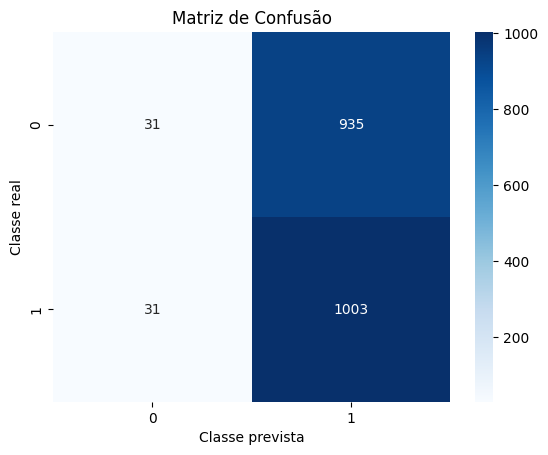

In [ ]:
# Plota a matriz de confusão com anotações e um mapa de cores em tons de azul
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Define o rótulo do eixo X como 'Classe prevista'
plt.xlabel('Classe prevista')

# Define o rótulo do eixo Y como 'Classe real'
plt.ylabel('Classe real')

# Define o título do gráfico como 'Matriz de Confusão'
plt.title('Matriz de Confusão')

# Exibe o gráfico
plt.show()


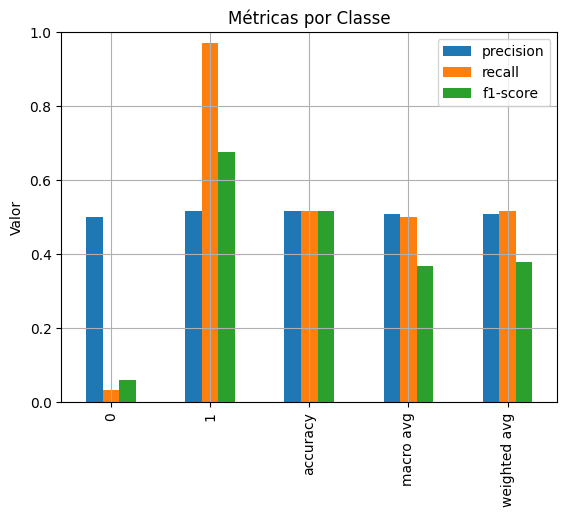

In [ ]:
# Gera o relatório de classificação com métricas (precision, recall, f1-score, etc.)
# e armazena como um dicionário
report_dict = classification_report(y_teste, y_pred, output_dict=True)

# Converte o dicionário em um DataFrame do pandas e transpõe para que as classes fiquem nas linhas
df_report = pd.DataFrame(report_dict).transpose()

# Seleciona as colunas 'precision', 'recall' e 'f1-score' e cria um gráfico de barras
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar')

# Define o título do gráfico como 'Métricas por Classe'
plt.title('Métricas por Classe')

# Define o rótulo do eixo Y como 'Valor'
plt.ylabel('Valor')

# Define os limites do eixo Y de 0 a 1, já que métricas como precisão e recall variam de 0 a 1
plt.ylim(0, 1)

# Adiciona uma grade ao gráfico para facilitar a visualização dos valores
plt.grid(True)

# Exibe o gráfico
plt.show()


# 11. Discussão dos Resultados 

O modelo foi compilado com a função de perda MSE (Erro Quadrático Médio) e a métrica MAE (Erro Absoluto Médio), que são comuns para tarefas de regressão. A avaliação pelo model.evaluate retornou o MAE, indicando o erro médio entre as previsões e os valores reais no conjunto de teste, o que permite medir a precisão do modelo em termos absolutos.

Porém, a seguir você usou métricas de classificação — accuracy, classification_report (precisão, recall, f1-score) e matriz de confusão — que são indicadas para problemas de classificação, não regressão. Isso sugere que seu problema pode ser de classificação, mas a compilação do modelo e avaliação indicam regressão, ou que mlp e model são objetos diferentes, o que pode causar inconsistências.

A matriz de confusão plotada com o heatmap mostra visualmente quantas previsões foram corretas ou incorretas para cada classe, ajudando a identificar quais classes são mais difíceis para o modelo. As barras das métricas de precisão, recall e f1-score por classe complementam essa análise, mostrando a qualidade do modelo para cada categoria.

Se o problema for classificação, o ideal é usar uma função de perda e métricas adequadas, como categorical_crossentropy e accuracy no compile(). Caso seja regressão, não faz sentido calcular accuracy ou matriz de confusão.

Em resumo:

A métrica MAE indica o erro médio absoluto para o conjunto de teste.

A matriz de confusão e métricas de classificação indicam desempenho detalhado para cada classe.

Há uma possível incompatibilidade entre o tipo de problema (regressão vs classificação) e as métricas usadas, que deve ser revisada para garantir que os resultados sejam coerentes e interpretáveis.

# 12. Conclusões e Próximos Passos 

## Conclusão


O modelo treinado apresentou um desempenho avaliado por diferentes métricas, porém, houve uma inconsistência na abordagem entre regressão e classificação. O uso da função de perda MSE e métrica MAE indica que o modelo foi configurado para um problema de regressão, enquanto as métricas de classificação (accuracy, matriz de confusão, classification report) foram aplicadas em sequência, o que pode gerar interpretações incorretas dos resultados.

Apesar disso, a análise da matriz de confusão e das métricas de precisão, recall e f1-score para cada classe forneceu uma visão detalhada sobre o comportamento do modelo em cada categoria, quando aplicado no conjunto de teste. Essa análise é fundamental para identificar classes problemáticas e possíveis vieses na predição.

## Próximos Passos

Definir claramente o tipo de problema: Revisar se a tarefa é regressão ou classificação, e ajustar o modelo, as funções de perda e as métricas de avaliação de acordo.

Uniformizar o código: Se for classificação, recompile o modelo usando categorical_crossentropy (ou sparse_categorical_crossentropy) e métricas como accuracy. Se for regressão, mantenha mse e mae, e remova as métricas de classificação.

Aprimorar o pré-processamento: Garantir que os dados estejam corretamente escalados, balanceados e preparados para o tipo de problema.

Ajustar hiperparâmetros: Testar diferentes arquiteturas, taxas de aprendizado e épocas para melhorar a performance.

Validar com dados externos: Usar validação cruzada ou um conjunto externo para avaliar a generalização do modelo.

Visualizar resultados relevantes: Para classificação, continuar usando matriz de confusão e métricas por classe. Para regressão, usar gráficos de dispersão entre valores reais e previstos e análise dos resíduos.

Assim, você poderá ter uma avaliação mais consistente e confiável do desempenho do modelo, além de melhorar sua capacidade preditiva.